# Classwork Example for 11 10 2020


The Boltzmann equation can be used to measure excitation temperature using observations multiple transitions of a molecule (see the **September 08** lecture) :

$\displaystyle \frac{N_u}{N_l} = \frac{g_u}{g_l} \exp\left(\frac{E_l - E_u}{k_B T_{ex}}\right)$

(1) Rewrite the Boltzmann equation as a function of $T_{ex}$, log$_{10}(N_u/g_u)$, and log$_{10}(N_l/g_l)$, and put this into the form of a slope of a line, e.g., $m = \left(\frac{y_2-y_1}{x_2-x_1}\right)$ 

(2) Use this relation to plot the following data set of NH$_3$ observations as a function of $E$. 


| **(J,K)** | **Energy** | **Column Density**|
| :- | :- | :- |
|  | $E/k_B$ (K) | $N$ (cm$^{-2}$) |
| (8,8)   | 686.8  | $4.8\times10^{13}$ |
| (9,9)   | 852.8  | $6.1\times10^{13}$ |
| (10,10) | 1036.4 | $1.5\times10^{13}$ |
| (11,11) | 1237.6 | $9.0\times10^{12}$ |
| (12,12) | 1456.4 | $1.4\times10^{13}$ |
| (13,13) | 1692.7 | $3.5\times10^{12}$ |


(3) Fit a slope to these data and use this to determine the excitation temperature (Note that for NH$_3$, T$_{ex}$ measured in this way is a good approximation for the true kinetic temperature $T_{kin}$).





In [2]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
#plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer




## Solution:

(1) We can rewrite $\displaystyle \frac{N_u}{N_l} = \frac{g_u}{g_l} \exp\left(\frac{E_l - E_u}{kT_{ex}}\right)$ as

$\displaystyle \log \left[ \frac{N_u/g_u}{N_l/g_l} \right] = \left(\frac{E_l - E_u}{kT_{ex}}\right)$

which using two logarithm rules (quotient and change of base) is just

$\displaystyle \log_{10} \left( \frac{N_u}{g_u}\right) - \log_{10} \left(\frac{N_l}{g_l}\right) = -\frac{0.434}{kT_{ex}} (E_u - E_l)$

We can then define a linear relationship between $N$ and $E$ with a slope $m$ equal to

$m = \displaystyle -\frac{0.434}{kT_{ex}}$



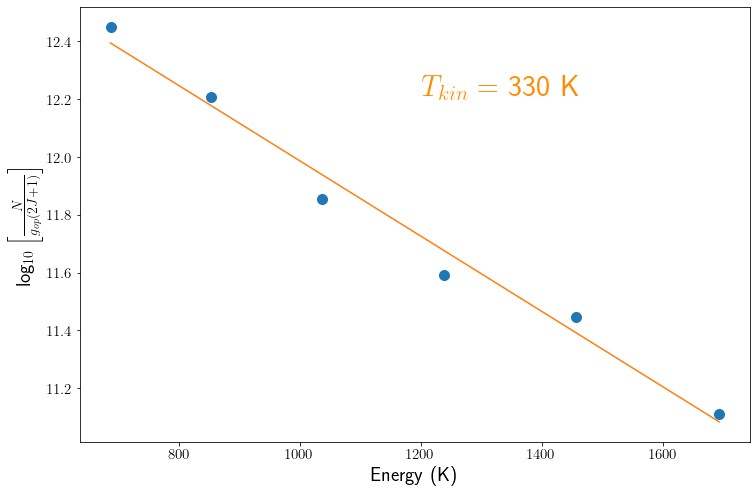

In [36]:

#Define the arrays for the variables
Js = np.array([8,9,10,11,12,13])
Es = np.array([686.8,852.8,1036.4,1237.6,1456.4,1692.7])
Ns = np.array([4.8e13,6.1e13,1.5e13,9.0e12,1.4e13,3.5e12])
g_ops = np.array([1,2,1,1,2,1])
N_plots = np.log10(Ns/(g_ops*(2*Js+1)))

#Do a linear least-squares fit for the slope and intercept
A = np.vstack([Es, np.ones(len(Es))]).T
m, c = np.linalg.lstsq(A, N_plots, rcond=None)[0]

T = -0.434/m

plt.figure(1,figsize=(12,8))
ax = plt.subplot()
plt.plot(Es, N_plots,'o',ms=10)
plt.plot(Es,Es*m+c) # plot the best-fit line
ax.tick_params(axis = 'both', which = 'major', labelsize = 15) 
plt.xlabel('Energy (K)',fontsize=20)
plt.ylabel('log$_{10}\\left[ \\frac{N}{g_{op}(2J+1)}\\right]$',fontsize=20)
plt.text(1200,12.2,'$T_{kin} =$ %i K'%np.round(T,-1),fontsize=30,color='darkorange');
